In [1]:
# Example usage:
from snake_environment import SnakeEnvironment
from snake_agent import DQN
import torch
import numpy as np
import time

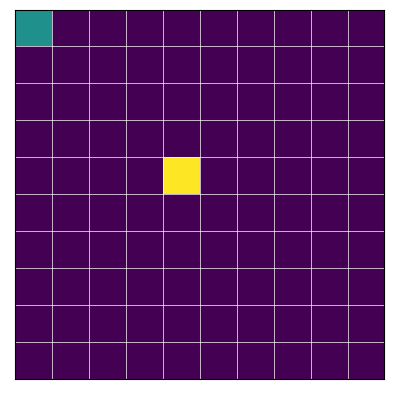

In [21]:
env = SnakeEnvironment(grid_size=10)  # Create a Snake environment with a 5x5 grid
state = env.reset()
env.render()

In [16]:
agent = DQN(env.state_size, env.action_size)
agent.load_state_dict(torch.load('snake_agent.pth'))
agent.eval()

DQN(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

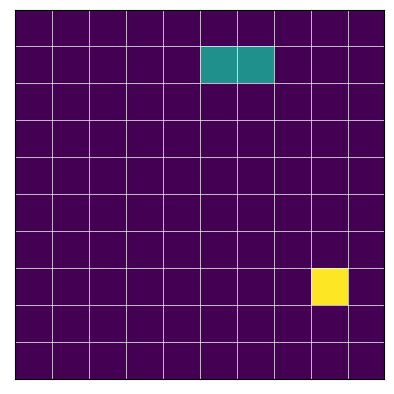

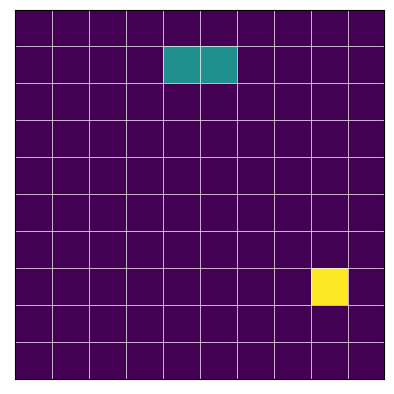

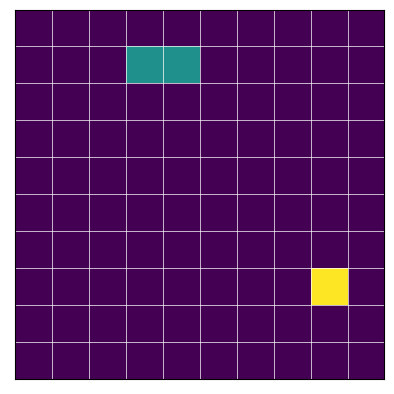

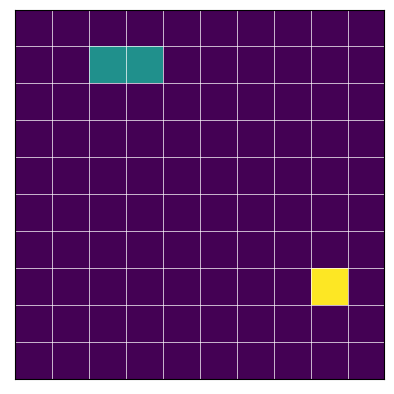

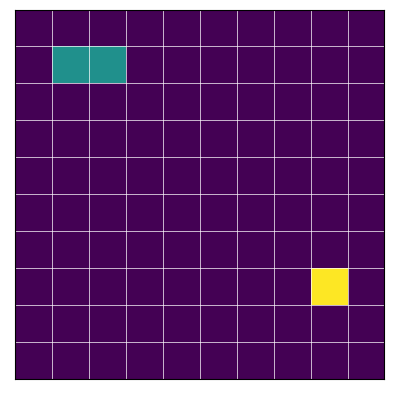

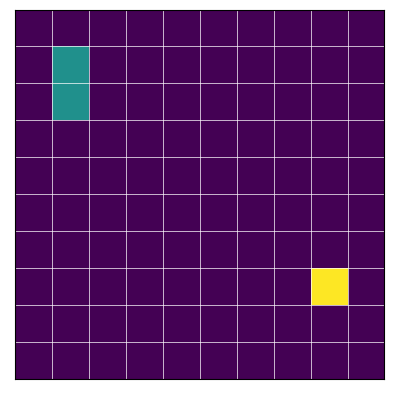

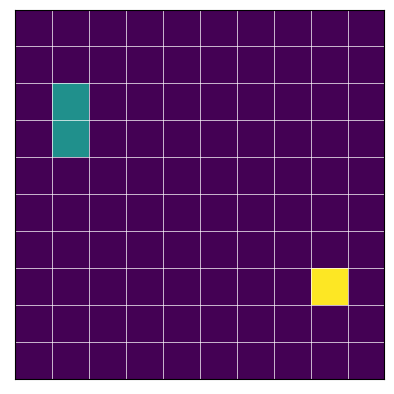

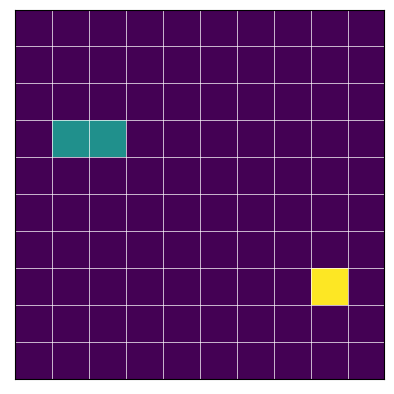

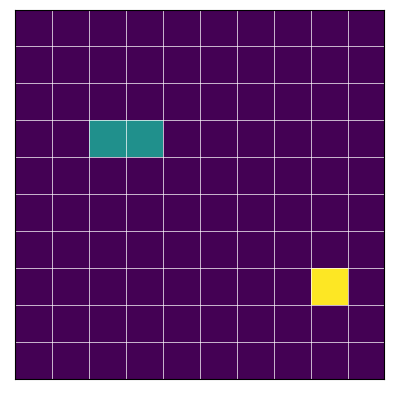

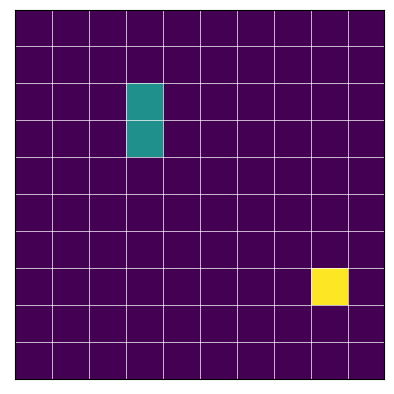

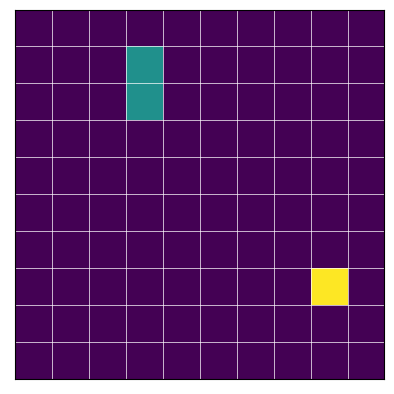

KeyboardInterrupt: 

In [20]:
import torch
import matplotlib.pyplot as plt

while not env.done:
    with torch.no_grad():  
        q_values = agent(torch.tensor(state, dtype=torch.float32))
        action = np.argmax(q_values.numpy())
    # action = env.random_action()  # Replace with your RL agent's action
    next_state, reward, done = env.step(action)
    # clear the output
    env.render()
    state = next_state
    time.sleep(1)